# Task 4 EDA Analysis

**Find all of Tia's EDA analysis' here**

## Part 1: Importing the Function and all Other Relevant Packages

I struggled getting the function from scripts to work. This was the only way I could figure out how to do it.

In [2]:
import os

In [11]:
os.chdir('../../')

In [12]:
os.getcwd()

'C:\\Users\\dmsda\\Desktop\\Office\\School\\2020-2021\\Cosc\\301\\course-project-group_1052'

### Function Import

In [13]:
from analysis.scripts import project_functions as pf

### Pandas and numpy import

In [14]:
import pandas as pd
import numpy as np

### Visualization tools import

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

## Part 2: Loading in dataframe and testing to see if it worked

In [16]:
df = pf.load_df('data/raw/KB_censored-lyrics.csv')
df.head()

,ogArtist,songName,badWord,count,category,year,ogLyric,kbLyric
0,Ariana Grande,7 rings,bitch,2,profanity,2019,Bought matching diamonds for six of my bitches,Bought matching diamonds so they know what thi...
1,Britney Spears,till the world ends,blow,1,alcohol & drugs,2011,"Baby, let me blow your mind tonight","Baby, come on wave your hands tonight"
2,Britney Spears,till the world ends,blow,2,alcohol & drugs,2011,"Baby, let me blow your mind tonight","Baby, come on wave your hands tonight"
3,Britney Spears,till the world ends,touch,1,sexual,2011,"Get you off with the touch, dancing in the dark",Set it off with a track dancing in the dark
4,Elle King,ex's and oh's,high,1,alcohol & drugs,2016,"I get high, and I love to get low","I get by, and I love to lay low"


## Part 2: Exploring the Dataframe

### Which song has the most swears in one context?

In [17]:
df[df['count']==df.loc[:,'count'].max()]

,ogArtist,songName,badWord,count,category,year,ogLyric,kbLyric
926,Major Lazer,lean on,blow,14,alcohol & drugs,2015,"Blow a kiss, fire a gun","Blow a kiss, you're the one"


### Which songs have the f word in them?

In [18]:
df[(df['badWord']=='fuck')]

,ogArtist,songName,badWord,count,category,year,ogLyric,kbLyric
16,Hilltop Hoods,exit sign,fuck,1,profanity,2019,But I don't give a fuck about the money,But I don't give a thought about the money
17,Hilltop Hoods,exit sign,fuck,2,profanity,2019,And I don't give a fuck about the party,And I don't give a thought about the party
18,Hilltop Hoods,exit sign,fuck,3,profanity,2019,I give a fuck about in this phoney world is Ari,I give a thought about in this phoney world is...
96,Ariana Grande,"​break up with your girlfriend, i'm bored",fuck,1,profanity,2019,Took one fuckin' look at your face (Hmm),Took another look at your face (Hmm)
97,Ariana Grande,"​break up with your girlfriend, i'm bored",fuck,2,profanity,2019,And I never even ever fuckin' met you,cuts verse
...,...,...,...,...,...,...,...,...
1339,Zara Larsson,ruin my life,fuck,8,profanity,2019,"Fuck up my nights, yeah, all of my nights, yeah","Ruin my nights, yeah, all of my nights, yeah"
1340,Zara Larsson,ruin my life,fuck,9,profanity,2019,"I want you to fuck up my nights, yeah","I want you to ruin my nights, yeah"
1341,Zara Larsson,ruin my life,fuck,10,profanity,2019,"Fuck up my nights, yeah, all of my nights, yea...","Ruin my nights, yeah, all of my nights, yeah"
1342,Zara Larsson,ruin my life,fuck,11,profanity,2019,"I want you to fuck up my nights, yeah","I want you to ruin my nights, yeah"


### Playing around with dataframes

#### Finding what bad word is the most used

In [19]:
dfBadWord_freq = (pd.DataFrame(df['badWord']
                  .value_counts())
                  .reset_index()
                  .rename(columns={'index':'badWord','badWord':'value'})
                  .loc[lambda x: x['value'] >= 20]
                 )
dfBadWord_freq

,badWord,value
0,fuck,89
1,shit,77
2,damn,68
3,man,57
4,kiss,53
5,bitch,39
6,god,34
7,drink,33
8,body,31
9,touch,31


#### Visualize with graph

Text(0.5, 0, 'Frequency of bad word')

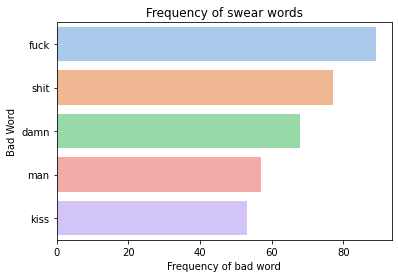

In [20]:
sns.countplot(data=df,
              y='badWord',
              order = df['badWord'].value_counts().iloc[:5].index,
              palette = 'pastel'
             )
plt.title('Frequency of swear words')
plt.ylabel('Bad Word')
plt.xlabel('Frequency of bad word')

#### Which artist says the f word the most?

Looks like it's Macklemore & Ryan Lewis!

In [21]:
df_fword = df[df['badWord']=='fuck']
df_fword['ogArtist'].value_counts()

Macklemore & Ryan Lewis    13
Zara Larsson               12
Ariana Grande               9
Maroon 5                    8
DNCE                        7
Hilltop Hoods               6
Travie McCoy                3
Rihanna                     3
Fort Minor                  3
Justin Timberlake           3
Drake                       2
Demi Lovato                 2
Halsey                      2
Lizzo                       2
Tinie Tempah                1
Fergie                      1
Bruno Mars                  1
Post Malone                 1
Taio Cruz                   1
David Guetta                1
Green Day                   1
Shop Boyz                   1
James Blunt                 1
DJ Khaled                   1
​fun.                       1
Iggy Azalea                 1
Estelle                     1
Ellie Goulding & Diplo      1
Name: ogArtist, dtype: int64

#### What kind of swears do Macklemore & Ryan Lewis use?

In [22]:
df_artistSwears = df[df['ogArtist']=='Macklemore & Ryan Lewis']['badWord'].value_counts()
df_artistSwears

fuck       13
hella       8
shit        5
man         5
damn        4
hell        2
bitch       2
ass         2
dope        2
ball        1
piss        1
pimp        1
cock        1
scrotum     1
bullet      1
body        1
god         1
kill        1
Name: badWord, dtype: int64

#### Usage of swear words over the years

In [23]:
df_byYears = df.sort_values(by='year')
df_byYears['year'].value_counts().sort_values().sort_index()

2001      3
2002     19
2003      8
2004      7
2005      5
2006     28
2007     64
2008     33
2009     67
2010     89
2011     35
2012     80
2013     73
2014     76
2015    171
2016    109
2017    170
2018    127
2019    189
Name: year, dtype: int64

#### Visualizing this using a histogram

<AxesSubplot:xlabel='year', ylabel='count'>

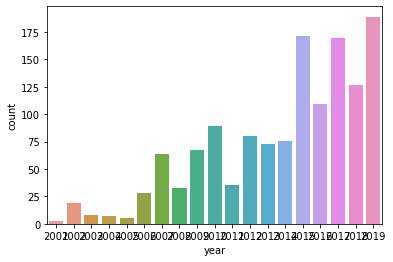

In [24]:
sns.countplot(data=df,
              x=df['year'],
              order = df['year'].sort_values().drop_duplicates()
             )

#### Finding the usage of the f word over the years

In [25]:
df_fWord = df[df['badWord']=='fuck']
df_fWord= (pd.DataFrame(df_fWord['year']
                        .value_counts())
           .reset_index()
           .rename(columns={'year':'value','index':'year'})
           .sort_values(by='year', ascending = False)
           .reset_index()
           .drop(columns='index')
          )
df_fWord

,year,value
0,2019,32
1,2018,2
2,2017,8
3,2016,10
4,2015,2
5,2014,4
6,2013,11
7,2012,4
8,2011,2
9,2010,3


#### Visualizing this change using a line plot

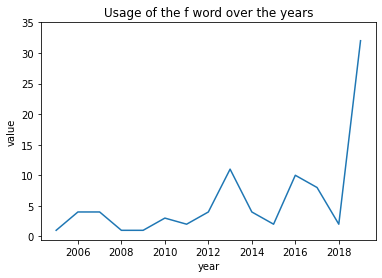

In [37]:
sns.lineplot(data=df_fWord, x='year', y='value')
plt.title('Usage of the f word over the years')
plt.yticks(range(0,36,5));

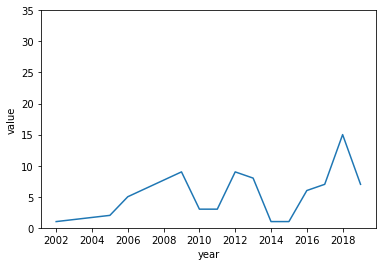

In [36]:
sns.lineplot(data=pf.badWorddf(df,'badWord','shit'),
             x='year',
             y='value'
            )
plt.yticks(range(0,36,5))
plt.xticks(range(2002,2020,2));

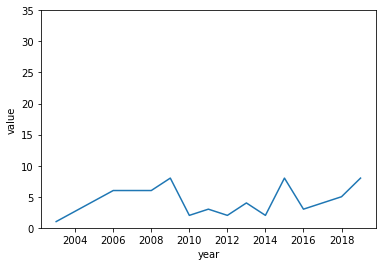

In [38]:
sns.lineplot(data=pf.badWorddf(df,'badWord','damn'),
             x='year',
             y='value'
            );
plt.yticks(range(0,36,5));

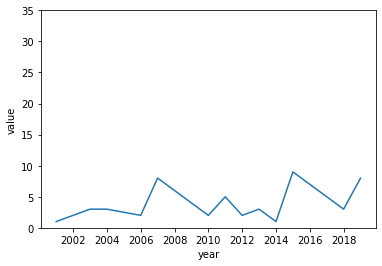

In [39]:
sns.lineplot(data=pf.badWorddf(df,'badWord','man'),
             x='year',
             y='value'
            )
plt.yticks(range(0,36,5))
plt.xticks(range(2002,2020,2));

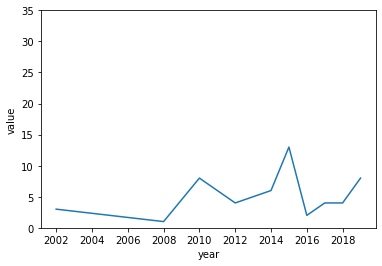

In [43]:
sns.lineplot(data=pf.badWorddf(df,'badWord','kiss'),
             x='year',
             y='value'
            )
plt.yticks(range(0,36,5))
plt.xticks(range(2002,2020,2));

#### Identity Category

I observed that amongst the most frequently used bad words, 'man' was among them. The word man is under the identity category, thus I sorted the dataframe to see what other words were categorized as identity

In [26]:
df[df['badWord'] == 'man'].loc[:,'category'].drop_duplicates()

5    identity
Name: category, dtype: object

In [11]:
df[df['category']=='identity']['badWord'].value_counts()

man            57
woman          27
men             7
women           3
lesbian         1
transgender     1
gay             1
Name: badWord, dtype: int64

In [27]:
df[df['badWord']=='lesbian']

,ogArtist,songName,badWord,count,category,year,ogLyric,kbLyric
806,Lady Gaga,born this way,lesbian,1,identity,2011,"Lesbian, transgender life",cuts verse


In [12]:
df[df['ogArtist'] == 'Lady Gaga']

,ogArtist,songName,badWord,count,category,year,ogLyric,kbLyric
22,Lady Gaga,alejandro,cigarette,2,alcohol & drugs,2010,Just smoke my cigarette and hush,Just walk away from me and hush
788,Lady Gaga,alejandro,cigarette,1,alcohol & drugs,2010,Just smoke my cigarette and hush,Just walk away from me and hush
789,Lady Gaga,alejandro,cigarette,3,alcohol & drugs,2010,Just smoke my cigarette and hush,Just walk away from me and hush
790,Lady Gaga,alejandro,cigarette,4,alcohol & drugs,2010,"Ale-Alejandro, Ale-Alejandro (Just smoke my ci...",Alejandro
791,Lady Gaga,alejandro,kiss,1,sexual,2010,"Don't wanna kiss, don't wanna touch","Don't wanna miss, don't want too much"
792,Lady Gaga,alejandro,kiss,2,sexual,2010,"Don't wanna kiss, don't wanna touch","Don't wanna miss, don't want too much"
793,Lady Gaga,alejandro,kiss,3,sexual,2010,Don't wanna kiss,Don't wanna miss
794,Lady Gaga,alejandro,kiss,4,sexual,2010,"Don't wanna kiss, don't wanna touch","Don't wanna miss, don't want too much"
795,Lady Gaga,alejandro,kiss,5,sexual,2010,"(Don't wanna kiss, don't wanna touch) Alejandr...",Alejandro
796,Lady Gaga,alejandro,smoke,1,alcohol & drugs,2010,Just smoke my cigarette and hush,Just walk away from me and hush


In [28]:
df[df['category']=='identity']['ogArtist'].value_counts()

David Guetta                17
Justin Timberlake           11
Lizzo                        7
Baha Men                     6
Ed Sheeran                   6
Macklemore & Ryan Lewis      5
Kanye West                   4
Jennifer Lopez               4
Lady Gaga                    3
Jet (band)                   3
Usher                        2
Bruno Mars                   2
Akon                         2
Tinie Tempah                 2
Beyoncé                      2
Ashlee Simpson               1
Taylor Swift                 1
Cobra Starship               1
Jessie J                     1
Rihanna                      1
Flo Rida                     1
The Black Eyed Peas          1
Lukas Graham                 1
Florida Georgia Line         1
Katy Perry                   1
Andy Grammer                 1
Meghan Trainor               1
Maroon 5                     1
Kelly Clarkson               1
Nelly                        1
Foster the People            1
Len                          1
Elle Kin